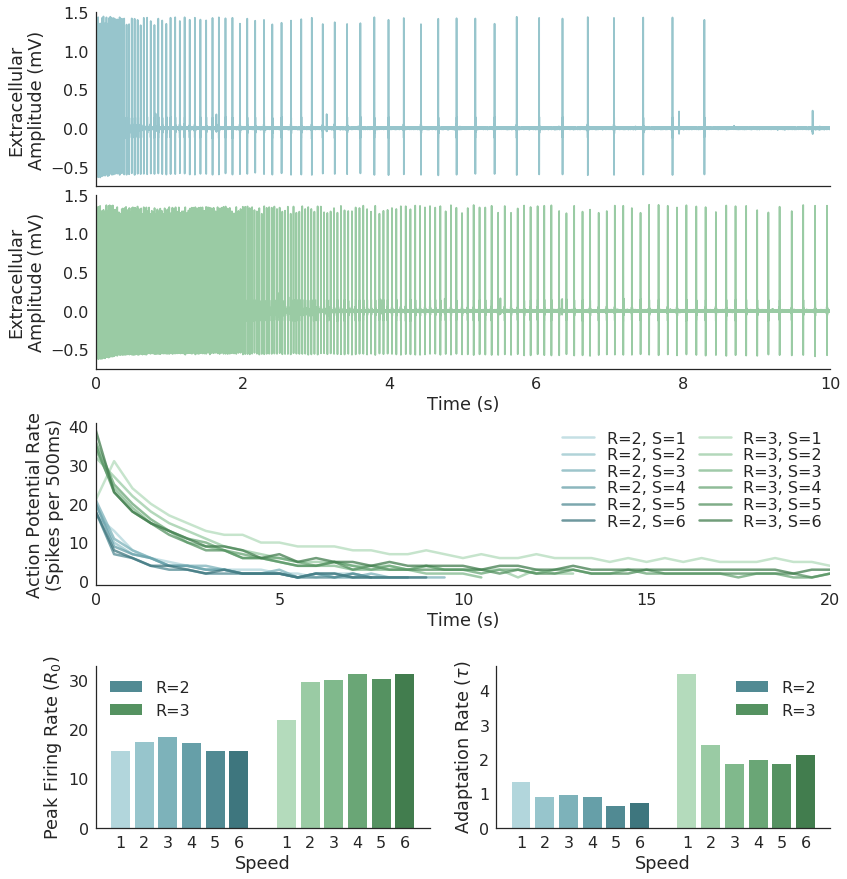

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pandas import read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=1.6)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot extracellular data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig = plt.figure(figsize=(12,15))

## Initialize canvas for raw trace plots.
gs = gridspec.GridSpec(2, 1)
gs.update(left=0.1, right=0.95, bottom=0.55, hspace=0.05)

## Initialize colors.
palettes = np.vstack([sns.cubehelix_palette(6, start=2.5, rot=0, dark=0.4, light=.8).as_hex(),
                      sns.cubehelix_palette(6, start=2, rot=0, dark=0.4, light=.8).as_hex()])

for n, p in enumerate([(2,2),(3,2)]):
    
    ## Load data.
    npz = np.load('raw/stretch_r%ss%s.npz' %(p[0], p[1]))
    data = npz['data']
    times = npz['times']
    
    ## Plot.
    ax = plt.subplot(gs[n, 0])
    ax.plot(times, data * 1e3, color=palettes[n,1])
    ax.set(xlim=(0, 10), xlabel='Time (s)', ylabel='Extracellular\nAmplitude (mV)', ylim=(-0.75, 1.5))
    if not n: ax.set(xticks=[], xlabel='')
        
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot spike rates.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
       
## Initialize canvas for spike rates and parameters.
gs = gridspec.GridSpec(2, 2)
gs.update(left=0.1, right=0.95, top=0.50, hspace=0.5, wspace=0.20)

## Plot histogram of spike magnitudes.
ax = plt.subplot(gs[0, :])
    
## Load spike rate data.
data = read_csv('spike_rates.csv')
        
for i, r in enumerate(data.Retraction.unique()):
        
    for j, s in enumerate(data.Speed.unique()):

        ## Extract data.
        t, y = data.loc[np.logical_and(data.Retraction==r, data.Speed==s),['Time','Rate']].T.as_matrix()
        
        ## Plot.
        color = palettes[i,j]
        ax.plot(t, y, lw=2.5, alpha=0.75, color=color, label='R=%0.0f, S=%0.0f' %(r,s))

ax.set(xlim=(0,20), xticks=np.arange(0,21,5), xlabel='Time (s)', ylabel='Action Potential Rate\n(Spikes per 500ms)')
ax.legend(ncol=2, fontsize=16, borderpad=0, labelspacing=0.1, columnspacing=0.8)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## data data.
data = read_csv('exponential_curve.csv')

## Plotting.
x = np.concatenate([np.arange(6), np.arange(6)+7])
xticklabels = np.concatenate([np.arange(6) for _ in range(3)]) + 1
ylabels = [r'Peak Firing Rate ($R_0$)', r'Adaptation Rate ($\tau$)']
colors = palettes.flatten()

for n, y in enumerate([r'$R_0$', r'$\tau$']):
    
    ## Barplots.
    ax = plt.subplot(gs[1, n])
    ax.bar(x, data[y], color=colors)
    ax.set(xticks=x, xticklabels=xticklabels, xlabel='Speed', ylabel=ylabels[n])
    
    ## Legend.
    ax.bar(0, 0, label='R=2', color=colors[4])
    ax.bar(0, 0, label='R=3', color=colors[10])
    ax.legend(loc=0)

sns.despine()